In [21]:
import random
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import confusion_matrix

In [2]:
df = sns.load_dataset('iris')
tipos = df.iloc[:,-1].unique().tolist()
df1 = df[ (df.iloc[:,-1]==tipos[0]) | (df.iloc[:,-1]==tipos[1]) ]
df2 = df[ (df.iloc[:,-1]==tipos[1]) | (df.iloc[:,-1]==tipos[2]) ]

In [3]:
from sklearn.preprocessing import MinMaxScaler
df1['species'] = df1['species'].replace({'setosa': 0, 'versicolor': 1})
df1 = df1.sample(frac=1).reset_index(drop=True)
df_normalized = pd.DataFrame(MinMaxScaler().fit_transform(df1), columns=df1.columns)

/tmp/ipykernel_50794/1334216853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['species'] = df1['species'].replace({'setosa': 0, 'versicolor': 1})


In [4]:
from sklearn.preprocessing import MinMaxScaler
df2['species'] = df2['species'].replace({'virginica': 0, 'versicolor': 1})
df2 = df2.sample(frac=1).reset_index(drop=True)
df_normalized = pd.DataFrame(MinMaxScaler().fit_transform(df2), columns=df2.columns)

/tmp/ipykernel_50794/195308449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['species'] = df2['species'].replace({'virginica': 0, 'versicolor': 1})


<b>Função sigmoide: </b><br>

$f(x) = \frac{1}{1+e^{-x}}$

In [5]:
def sigmoide(x):
    total = 1 / (1 + math.e**-x)
    if total >= 0.5:
        return total, 1
    return total, 0

def sig(df,w,b):
    lista_predicto = []
    lista_real = []
    lista_valor_real = []
    linhas, colunas  = df.shape
    for linha in range(linhas):
        total = 0
        for coluna in range(colunas-1):
            x = df.iloc[linha,coluna]
            total += x * w[coluna]
    
        
        valor_real, y_predicto = sigmoide(total + b)

        lista_predicto.append(y_predicto)
        lista_valor_real.append(valor_real)
        
    lista_real = df.iloc[:,colunas-1].tolist()
    return lista_predicto, lista_real, lista_valor_real

<b>Calculando o gradiente descendente para o peso </b> <br><br>

$\frac{\partial E}{\partial \omega_k} = 
\frac{1}{N} \sum_{i=1}^N \frac{\partial (\hat{y}-y)^2}{\partial \omega_k}$ <br><br>

$=\frac{1}{N} \sum_{i=1}^N \frac{\partial (\hat{y}_i-y_i)^2}{\partial (\hat{y}_i-y_i)}$ 
$\cdot\frac{\partial (\hat{y}_i-y_i)}{\partial \hat{y}_i}$
$\cdot \frac{\partial \hat{y}_i}{\partial \omega_{k}}$ <br><br> 

$=\frac{1}{N} \sum_{i=1}^N \frac{\partial (\hat{y}-y)^2}{\partial (\hat{y}-y)}$ 
$\cdot\frac{\partial (\hat{y}-y)}{\partial \hat{y}}$
$\cdot \frac{\partial f_a(sum)}{\partial sum}$
$\cdot \frac{\partial sum}{\partial \omega_{k}}$ <br><br> 

Considerando a função de ativação sigmoide: <br><br>
$=\frac{1}{N} \sum_{i=1}^N 2\cdot(\hat{y}_i-y_i) \cdot 1 \cdot (1-\hat{y}_i)(\hat{y}_i) \cdot x_i^k$


<b>Fórmula final para atualizar o peso</b> <br><br>

Considerando a função de ativação sigmoide: <br><br>

$\omega_{k}^{t} = \omega_{k}^{t-1} - \eta^{t} \cdot\frac{1}{N} \sum_{i=1}^N 2\cdot(\hat{y}_i-y_i) \cdot 1 \cdot (1-\hat{y}_i)(\hat{y}_i) \cdot x_i^k$ <br><br>

<b>Calculando o gradiente descendente para o bias </b> <br><br>

$\frac{\partial E}{\partial b_k} = 
\frac{1}{N} \sum_{i=1}^N \frac{\partial (\hat{y}-y)^2}{\partial b_k}$ <br><br>

$=\frac{1}{N} \sum_{i=1}^N \frac{\partial (\hat{y}_i-y_i)^2}{\partial (\hat{y}_i-y_i)}$ 
$\cdot\frac{\partial (\hat{y}_i-y_i)}{\partial \hat{y}_i}$
$\cdot \frac{\partial \hat{y}_i}{\partial b_{k}}$ <br><br> 

$=\frac{1}{N} \sum_{i=1}^N \frac{\partial (\hat{y}-y)^2}{\partial (\hat{y}-y)}$ 
$\cdot\frac{\partial (\hat{y}-y)}{\partial \hat{y}}$
$\cdot \frac{\partial f_a(sum)}{\partial sum}$
$\cdot \frac{\partial sum}{\partial b_{k}}$ <br><br> 

Considerando a função de ativação sigmoide: <br><br>
$=\frac{1}{N} \sum_{i=1}^N 2\cdot(\hat{y}_i-y_i) \cdot 1 \cdot (1-\hat{y}_i)(\hat{y}_i) \cdot 1$


<b>Fórmula final para atualizar o bias</b> <br><br>

Considerando a função de ativação sigmoide: <br><br>

$b_{k}^{t} = b_{k}^{t-1} - \eta^{t} \cdot\frac{1}{N} \sum_{i=1}^N 2\cdot(\hat{y}_i-y_i) \cdot 1 \cdot (1-\hat{y}_i)(\hat{y}_i) \cdot 1$ <br><br>

Obs: Como discutido em aula iremos desconsiderar o "2" em nossos cálculos

In [6]:
def atualizacao_peso(lista_predicto,lista_real,df,w,n,b,interacao,valor_real):
    
    w_novo = []
    b_total = 0
    valida_b = False
    #n = n_interacao(interacao,n)

    linhas, colunas  = df.shape
    
    y_diferenca = [i1 - i2 for i1, i2 in zip(valor_real,lista_real)]

    for coluna in range(colunas-1):
        w_total = 0
        

        for linha in range(linhas):
            #
            w_total += (y_diferenca[linha] * df.iloc[linha,coluna] * (1-valor_real[linha]) * valor_real[linha])

            if not valida_b: 
                b_total += (y_diferenca[linha] * (1-valor_real[linha]) * valor_real[linha])

        valida_b = True
        w_total = w[coluna] - n * (w_total/linhas)
        w_novo.append(w_total)


    b_novo = b_total / linhas
    b_novo = b - n * b_novo
    
    return w_novo,b_novo

In [7]:
w = [random.gauss(0, 0.5) for _ in range(df.shape[1] - 1)]
b = random.gauss(0, 0.5)
n=0.9

In [9]:
interacao = 1000
for i in tqdm(range(1,interacao)):
    if (interacao%11==0):
        n = n*0.9
    lista_predicto, lista_real, valor_real = sig(df_normalized,w,b)
    w, b = atualizacao_peso(lista_predicto,lista_real,df_normalized,w,n,b,i,valor_real)

100%|█████████████████████████████████████████| 999/999 [00:16<00:00, 59.03it/s]


100%|██████████| 9999/9999 [02:59<00:00, 55.62it/s]


In [ ]:
interacao = 1000
for i in tqdm(range(1,interacao)):
    lista_predicto, lista_real, valor_real = sig(df_normalized,w,b)
    w, b = atualizacao_peso(lista_predicto,lista_real,df_normalized,w,n,b,i,valor_real)


100%|██████████| 999/999 [00:18<00:00, 52.91it/s]


In [12]:
df_final = pd.DataFrame({'Real': lista_real, 'Pred': lista_predicto, 'Valor Real':valor_real})
a = 0 
print(f" REAL  -  PREDICTO  -  VALOR PREDICTO REAL ")
for i in range(len(df_final)):
    print(f" {df_final['Real'].iloc[i]}   -    {df_final['Pred'].iloc[i]}    -    {df_final['Valor Real'].iloc[i]} ")
    if df_final['Real'].iloc[i] == df_final['Pred'].iloc[i]:
        a += 1
print(f'taxa de acertos {a/len(df_final)*100}%')

 REAL  -  PREDICTO  -  VALOR PREDICTO REAL 
 0.0   -    0    -    0.017711894790072305 
 1.0   -    1    -    0.8761306737707282 
 1.0   -    1    -    0.9860924539788252 
 1.0   -    1    -    0.9109040289767111 
 0.0   -    0    -    0.07006536295728591 
 0.0   -    0    -    0.3579537126293373 
 0.0   -    0    -    0.40773151941477076 
 0.0   -    0    -    0.0163500812986886 
 0.0   -    0    -    0.12747856568134955 
 0.0   -    0    -    0.00711014631390507 
 1.0   -    1    -    0.5426493079026742 
 0.0   -    0    -    0.30206449811205205 
 0.0   -    0    -    0.03784442658810936 
 0.0   -    0    -    0.023910961722066467 
 1.0   -    1    -    0.8439300732068795 
 1.0   -    1    -    0.5551464174255821 
 1.0   -    1    -    0.9279315034559924 
 0.0   -    0    -    0.08044742006821658 
 1.0   -    1    -    0.7956588540522209 
 1.0   -    1    -    0.9031993390860772 
 0.0   -    0    -    0.014316068457281441 
 0.0   -    0    -    0.04239597727259211 
 0.0   -    0    -

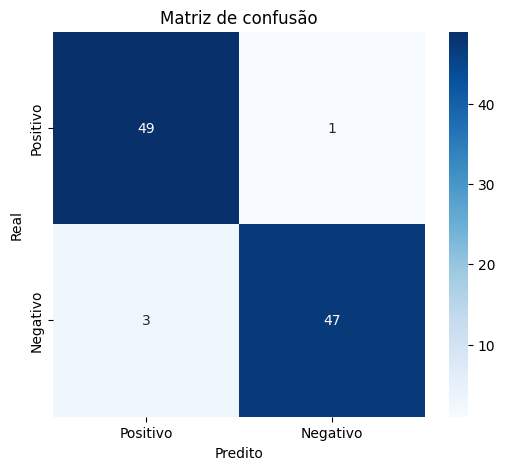

In [23]:
cm = confusion_matrix(df_final.iloc[:,0], df_final.iloc[:,1])

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Positivo", "Negativo"], yticklabels=["Positivo", "Negativo"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de confusão")
plt.show()